In [29]:
# import requests
from __future__ import print_function    # (at top of module)
import time
import sys
import os
import pandas as pd
import numpy as np
import pickle

PROJ_ROOT = os.path.join(os.getcwd(), os.pardir)

%load_ext watermark
%watermark -a "Thomas Turner" -d -t -v -p numpy,pandas -g

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Thomas Turner 07/28/2016 20:30:15 

CPython 3.5.2
IPython 5.0.0

numpy 1.11.1
pandas 0.18.1
Git hash: fd21995669869079ecf923799958ac19ae26a658


In [31]:
# load environment variables from .env file using dotenv.
from dotenv import load_dotenv
dotenv_path = os.path.join(PROJ_ROOT, '.env')
load_dotenv(dotenv_path)

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)

# import my methods from the source code
%aimport data.spotipy_functions
from data.spotipy_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# run this to generate a fresh 100 track recomendations from a seed
# trackset = get_new_recs_and_feats(['1ohelc8DR2NNpUGukeCnGY'],100)
# trackset = band_BPMs(recoms_with_features,80,170)

# run this to SAVE trackset to file
# trackset.to_pickle(os.path.join(PROJ_ROOT,'data','interim','recommends_data_proto1.pkl'))

# run this to LOAD trackset from file
# trackset = pd.read_pickle(os.path.join(PROJ_ROOT,'data','interim','recommends_data_proto1.pkl'))


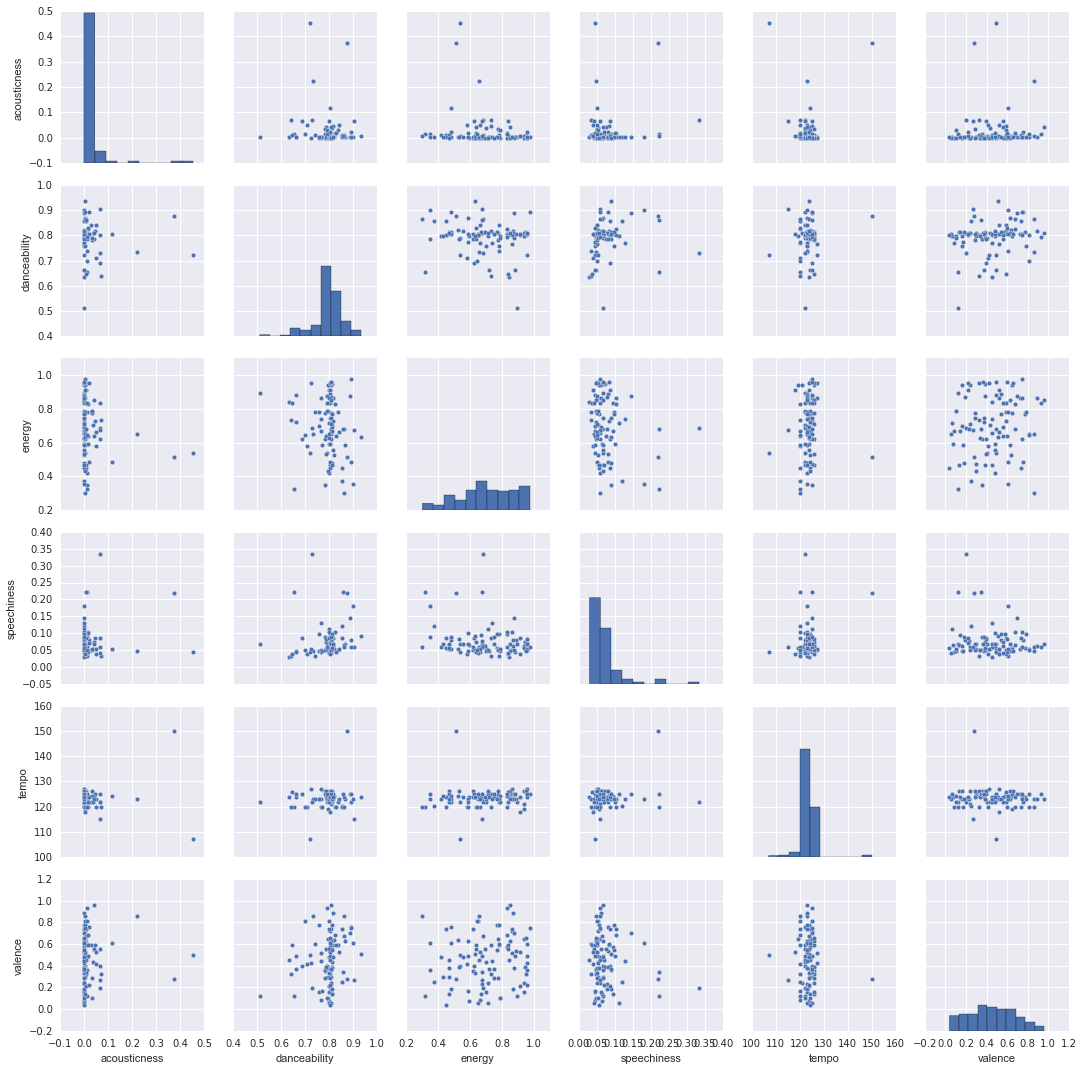

In [46]:
import seaborn as sb
useful_features = ['acousticness','danceability','energy','speechiness','tempo','valence']
sb.pairplot(trackset[useful_features])

In [73]:
# select the first n rows of trackset for training data
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
X = trackset.head(10)[useful_features]
Y = [0,1,0,1,0,0,0,1,1,0]

In [74]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB()

In [75]:
clf.predict_proba(trackset.tail(90)[useful_features])

array([[ 1.    ,  0.    ],
       [ 0.5102,  0.4898],
       [ 0.3268,  0.6732],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 0.9501,  0.0499],
       [ 0.9683,  0.0317],
       [ 1.    ,  0.    ],
       [ 0.9999,  0.0001],
       [ 1.    ,  0.    ],
       [ 0.539 ,  0.461 ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 0.9999,  0.0001],
       [ 0.9982,  0.0018],
       [ 0.12  ,  0.88  ],
       [ 0.9995,  0.0005],
       [ 0.2996,  0.7004],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 0.0671,  0.9329],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 0.9942,  0.0058],
       [ 0.7089,  0.2911],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 0.9997,  0.0003],
 